In [15]:
from importlib import reload
import flymovie as fm
from flymovie.simnuc import Sim
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
import seaborn as sns
from importlib import reload
import umap
import scipy.ndimage as ndi
import skimage as ski
import matplotlib.image as mpimg
import tempfile
import shutil
import mixmod
import scipy.stats as stats

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
im = fm.read_czi('/Volumes/stadler_5tb/old-red/2022-03-21/26983-1-1-em2-17.czi', swapaxes=False)

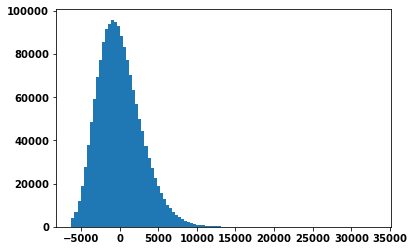

interactive(children=(Dropdown(description='Color', index=1, options=('prism', 'cividis', 'Gators', 'Reds', 'i…

In [139]:
t = 4500
sm = ndi.gaussian_filter(im, 3)
mask = np.where(sm > t, True, False)
nucmean = np.mean(im[mask])
diff = im - nucmean
resid_vals = diff[mask]
vals = im[mask]
plt.hist(resid_vals, bins=100);
fm.viewer(mask)

In [140]:
max_ = 15_000
mixture_onegauss = mixmod.MixtureModel([stats.norm], params=[{'loc': 5000, 'scale': 3000}])
mixture_gamma_gauss = mixmod.MixtureModel([stats.gamma, stats.norm], params=[{'a':1, 'scale':10_000},{'scale':10_000}])
vals = vals
mixture_onegauss.fit(data=vals)
mixture_gamma_gauss.fit(data=vals)


(157, -15576536.678086651)

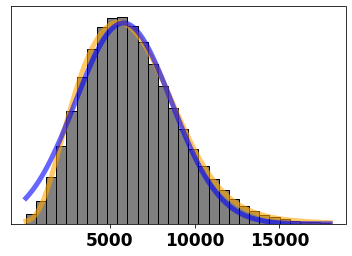

In [153]:
bins=100
max_ = 18_000
plt.hist(vals, bins=30, density=True, facecolor='grey', edgecolor='black', range=(vals.min(), max_));
x = np.linspace(vals.min(), max_, bins)
y = mixture_onegauss.pdf(x)
#plt.plot(x,y, linewidth=5, alpha=0.5, color="blue")
x = np.linspace(vals.min(), max_, bins)
y = mixture_gamma_gauss.pdf(x)
plt.plot(x,y, linewidth=5, alpha=0.6, color="orange")
y = stats.norm.pdf(x, loc=5800, scale=2836)
plt.plot(x,y, linewidth=5, alpha=0.6, color="blue")
plt.yticks([])
plt.xticks([5000, 10000, 15000], size=17)
#plt.xlabel('Pixel Intensity', size=17)
plt.savefig('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/figuredata/W2-describe-sim-msm/noise_hist.png', dpi=300)

In [147]:
mixture_onegauss

MixtureModel(components=['norm'],
             params=[{'loc': 6295.715390563188, 'scale': 2836.5652608355635}],
             params_fix=[{}],
             weights=[1.0],
             name='mixture')

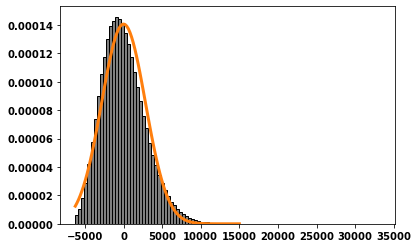

In [128]:
max_ = 15_000
mixture = mixmod.MixtureModel([stats.norm], params=[{'loc': 0, 'scale': 3000}])
#mixture = mixmod.MixtureModel([stats.gamma, stats.norm], params=[{'a':1, 'scale':3_000},{'scale': 3_000}])
#mixture = mixmod.MixtureModel([stats.gamma, stats.norm], params=[{'a':1, 'scale':3_000},{'scale': 3_000}])
vals = resid_vals
mixture.fit(data=vals)
mixture
bins=100
x = np.linspace(vals.min(), max_, bins)
y = mixture.pdf(x)
plt.hist(vals, bins=bins, density=True, facecolor='grey', edgecolor='black');
plt.plot(x,y, linewidth=3)

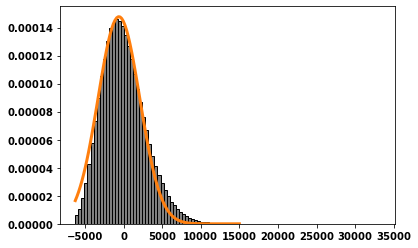

In [136]:
y2 = stats.norm.pdf(x, loc=-600, scale=2700)
plt.hist(vals, bins=bins, density=True, facecolor='grey', edgecolor='black');
plt.plot(x,y2, linewidth=3)

In [98]:
t = 4500
sm = ndi.gaussian_filter(im, 3)
mask = np.where(sm > t, im, 0)
vals = im[mask.astype(bool)]
fm.viewer(mask)

interactive(children=(Dropdown(description='Color', index=1, options=('prism', 'cividis', 'Gators', 'Reds', 'i…

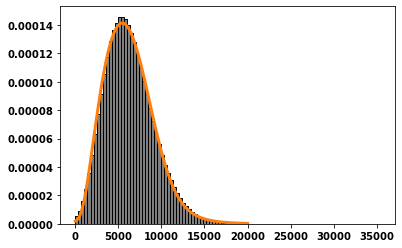

In [107]:
max_ = 20_000
#mixture = mixmod.MixtureModel([stats.norm], params=[{'loc': 5400, 'scale': 3000}])
mixture = mixmod.MixtureModel([stats.gamma, stats.norm], params=[{'a':1, 'scale':10_000},{'scale':10_000}])
mixture.fit(data=vals)
mixture
bins=100
x = np.linspace(vals.min(), max_, bins)
y = mixture.pdf(x)
plt.hist(vals, bins=bins, density=True, facecolor='grey', edgecolor='black');
plt.plot(x,y, linewidth=3)

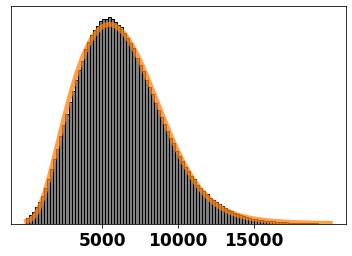

In [119]:
plt.rcParams.update({'font.weight':'heavy'})
plt.hist(vals, bins=bins, density=True, facecolor='grey', edgecolor='black', range=(0, max_));
plt.plot(x,y, linewidth=5, alpha=0.75)
plt.yticks([])
plt.xticks([5000,10000,15000], size=17)
#plt.xlabel('Pixel Intensity', size=17)
plt.savefig('/Users/michaelstadler/Bioinformatics/Projects/rpb1/data/figuredata/W2-describe-sim-msm/noise_hist.png', dpi=300)

In [112]:
?plt.xticks

Signature: plt.xticks(ticks=None, labels=None, **kwargs)
Docstring:
Get or set the current tick locations and labels of the x-axis.

Pass no arguments to return the current values without modifying them.

Parameters
----------
ticks : array-like, optional
    The list of xtick locations.  Passing an empty list removes all xticks.
labels : array-like, optional
    The labels to place at the given *ticks* locations.  This argument can
    only be passed if *ticks* is passed as well.
**kwargs
    `.Text` properties can be used to control the appearance of the labels.

Returns
-------
locs
    The list of xtick locations.
labels
    The list of xlabel `.Text` objects.

Notes
-----
Calling this function with no arguments (e.g. ``xticks()``) is the pyplot
equivalent of calling `~.Axes.get_xticks` and `~.Axes.get_xticklabels` on
the current axes.
Calling this function with arguments is the pyplot equivalent of calling
`~.Axes.set_xticks` and `~.Axes.set_xticklabels` on the current axes.

Exam

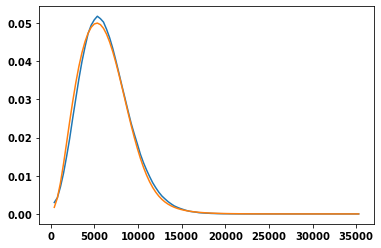

In [94]:
h = np.histogram(vals, bins=100)
x = h[1][1:]
y = h[0]
y2 = mixture.pdf(x)
plt.plot(x, y / np.sum(y))
plt.plot(x, y2 / np.sum(y2))


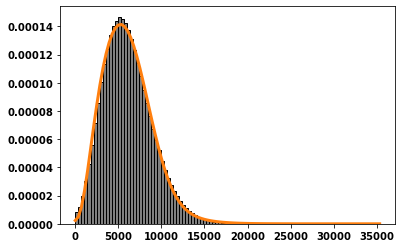

In [95]:
bins=100
x = np.linspace(vals.min(), vals.max(), bins)
y = mixture.pdf(x)
plt.hist(vals, bins=bins, density=True, facecolor='grey', edgecolor='black');
plt.plot(x,y, linewidth=3)

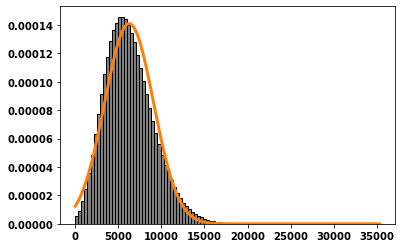

In [100]:
mixture = mixmod.MixtureModel([stats.norm, stats.norm], params=[{'loc': 5400, 'scale': 3000}, {'loc': 5400, 'scale': 3000}])
mixture.fit(data=vals)
mixture
bins=100
x = np.linspace(vals.min(), vals.max(), bins)
y = mixture.pdf(x)
plt.hist(vals, bins=bins, density=True, facecolor='grey', edgecolor='black');
plt.plot(x,y, linewidth=3)

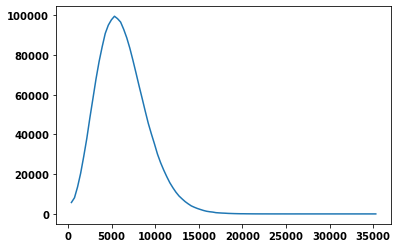

In [12]:
h = np.histogram(im[mask.astype(bool)], bins=100)
x = h[1][1:]
y = h[0]
plt.plot(x,y)

In [79]:
mixture = mixmod.MixtureModel([stats.norm], params=[{'loc': 5400, 'scale': 3000}])
mixture.fit(data=y)
mixture

MixtureModel(components=['norm'],
             params=[{'loc': 19228.21, 'scale': 31303.450013790807}],
             params_fix=[{}],
             weights=[1.0],
             name='mixture')

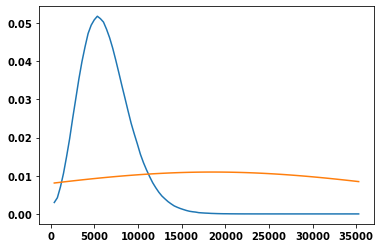

In [55]:
x2 = np.linspace(x.min(), x.max(), 100)
y2 = mixture.pdf(x2)
plt.plot(x,y / np.sum(y))
plt.plot(x2, y2 / np.sum(y2))

0.0015622894133308512

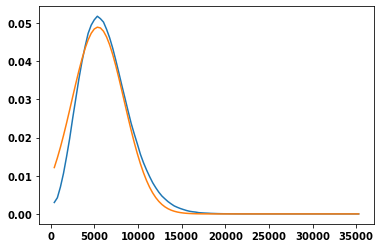

In [75]:
y2 = stats.norm.pdf(x2, loc=5400, scale=3000)
plt.plot(x,y / np.sum(y))
plt.plot(x2, y2 / np.sum(y2))